In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

Study the distribution of the the lifetime (failure time) of fuses

In [2]:
data = pd.read_csv("datasets/fuses.csv")
x = data["time"]

(array([18.,  6.,  7.,  3.,  8., 27., 29., 36., 35., 36., 41., 31., 28.,
        20., 17., 16., 10.,  7.,  7.,  4.,  3.,  3.,  3.,  1.,  0.,  1.,
         1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.]),
 array([8.38588100e-03, 2.21987884e-01, 4.35589887e-01, 6.49191890e-01,
        8.62793893e-01, 1.07639590e+00, 1.28999790e+00, 1.50359990e+00,
        1.71720190e+00, 1.93080391e+00, 2.14440591e+00, 2.35800791e+00,
        2.57160992e+00, 2.78521192e+00, 2.99881392e+00, 3.21241593e+00,
        3.42601793e+00, 3.63961993e+00, 3.85322193e+00, 4.06682394e+00,
        4.28042594e+00, 4.49402794e+00, 4.70762995e+00, 4.92123195e+00,
        5.13483395e+00, 5.34843596e+00, 5.56203796e+00, 5.77563996e+00,
        5.98924196e+00, 6.20284397e+00, 6.41644597e+00, 6.63004797e+00,
        6.84364998e+00, 7.05725198e+00, 7.27085398e+00, 7.48445599e+00,
        7.69805799e+00, 7.91165999e+00, 8.12526199e+00, 8.33886400e+00,
        8.55246600e+00]),
 <BarContainer objec

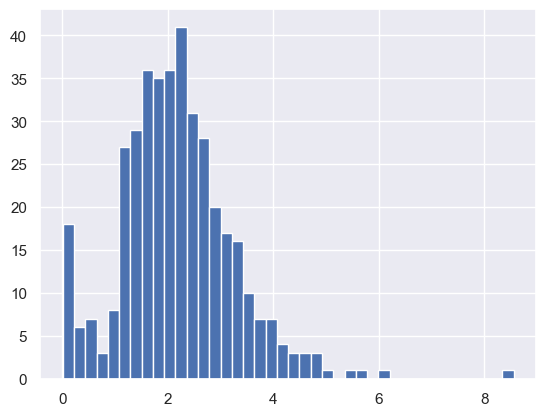

In [3]:
plt.hist(x, bins=int(len(x)/10))

### Mathematical derivation
Proposed model
$$
f(x_i) =  
            w \lambda \exp \{ -\lambda x \} + 
            (1-w) \frac {1} {\sqrt {2\pi} \tau x} \exp \{ 
                -\frac {1} {2 \tau^2} ( \log(x_i) - \mu )^2
                \}
        , x > 0
$$


E-step

$$

p_{z_{k}}(x_i) = \frac {\pi_k f(x_i)} {\sum \pi_j f(x_i)} = v_{i,k}

$$



M-step

$$
Q(\theta, \theta^{old}) = \sum\limits_{i=1}^{N} p(Z | X, \theta^{old}) \log[p(x | Z, \theta)]

\rightarrow

\theta^{new} = argmax ( Q(\theta, \theta^{old}) )

\\ = \sum\limits_{i=1}^{N} [ p_{z_1}(x_i) \log[w \lambda \exp\{-\lambda x_i\}] + p_{z_2}(x_i) \log[ (1-w) \frac {1} {\sqrt {2\pi} \tau } \exp \{ 
                -\frac {1} {2 \tau^2} ( \log(x_i) - \mu )^2
                \}  ] ] 
$$

$$
= \sum\limits_{i=1}^{N} p_{z_1}(x_i)[ \log(w) + \log(\lambda) - \lambda x_i ] + p_{z_2}(x_i)[\log(1-w) - \log(\sqrt{2\pi} \tau) 

- \frac {(\log(x_i) - \mu)^2} {2 \tau ^2} ]
$$

$$
= \sum\limits_{i=1}^{N} v_{i,1}[ \log(w) + \log(\lambda) - \lambda x_i ] + v_{i,2}[\log(1-w) - \log(\sqrt{2\pi} \tau) 

- \frac {(\log(x_i) - \mu)^2} {2 \tau ^2} ]
$$

Optimization Procedure

$$

\frac {\partial Q} {\partial w} = \frac {1} {w} \sum\limits_{i=1}^{N} v_{i,1} - \frac {1} {1-w} \sum\limits_{i=1}^{N} v_{i,2} = 0 \rightarrow
w = \frac {\sum\limits_{i=1}^{N} v_{i,1}} {\sum\limits_{i=1}^{N} v_{i,1} + \sum\limits_{i=1}^{N} v_{i,2}}
$$

$$

\frac {\partial Q} {\partial \lambda} = \sum\limits_{i=1}^{N} v_{i,1} \frac {1} {\lambda} - \sum\limits_{i=1}^{N} v_{i,1} x_i = 0

\rightarrow 

\lambda = \frac {\sum\limits_{i=1}^{N} v_{i,1}}  {\sum\limits_{i=1}^{N} v_{i,1} x_i}
$$

$$

\frac {\partial Q} {\partial \mu} = \sum\limits_{i=1}^{N} v_{i,2} \frac {2 (\log(x_i) - \mu)} {2 \tau ^2} = 0


\rightarrow 

\mu = \frac {\sum\limits_{i=1}^{N} v_{i,2} \log(x_i)}  {\sum\limits_{i=1}^{N} v_{i,2}}
$$

$$
\frac {\partial Q} {\partial \tau} = 

    \sum\limits_{i=1}^{N} v_{i,2} \frac {-\sqrt{2\pi}} { \tau } +

    \sum\limits_{i=1}^{N} v_{i,2} \frac {2(\log(x_i) - \mu)^2} {2 \tau ^3} 

    = 0 

\rightarrow 

\tau^2 = \frac {\sum\limits_{i=1}^{N} v_{i,2} (\log(x_i) - \mu)^2} {\sum\limits_{i=1}^{N} v_{i,2}} 
$$


In [4]:
x = data["time"]

The following statistical code is equivalent between R and SciPy.stats:

    mu = 3
    tau = 2
    
    r      > dlnorm(x, mu, tau)
    python > lognorm.pdf(x, scale=np.exp(mu), s=tau)
    r      > dlnorm(x, mu, tau, log=TRUE)
    python > lognorm.logpdf(x, scale=np.exp(mu), s=tau)

    r      > dexp(x, shape=lam)
    python > expon.pdf(x, scale=1/lam, s=tau)
    r      > dexp(x, shape=lam, log=TRUE)
    python > expon.logpdf(x, scale=1/lam)

Actual Answer

w = 0.09, lam = 3.05, mu=0.78, tau=0.38

In [5]:
# Initial conditions
K = 2
w_0 = 0.3
lam_0 = np.std(x)
mu_0 = np.mean(x)
tau_0 = np.std(x)

### Algorithm

Convergence: 0.0000081 after 80 steps
w:      0.08734068809143702
lambda: 3.05229481864655
mu:     0.7824630225914216
lambda: 0.37902701112113835


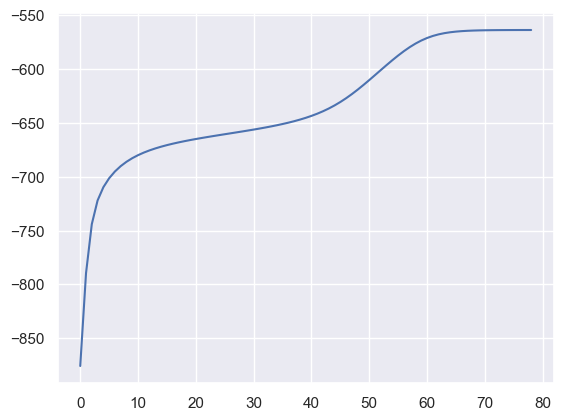

In [6]:
w = 0.5
mu = 1
lam = 1
tau = lam_0

mu_ = []
w_ = []
lam_ = []
tau_= []

QQ = []
QQ_last = -1e5

eps = 1e-5
epsilon = 1000

mu_ = []
w_ = []

convergence = False

i = 0
while not convergence:
    i += 1
    # E step
    p_Z = np.zeros((len(x), K))

    p_Z[:,0] = np.log(w) + stats.expon.logpdf(x, scale=1/lam)
    p_Z[:,1] = np.log(1 - w) + stats.lognorm.logpdf(x, scale=np.exp(mu), s=tau)
    # p_Z[:,1] = np.log(1 - w) + stats.lognorm.logpdf(x, scale=mu, s=tau)
    # Convert from Log scale to Probabilities    
    total_p_Z = np.sum(np.exp(p_Z - np.max(p_Z, axis=1).reshape(-1,1)), axis=1).reshape(-1,1)
    p_Z = np.exp(p_Z - np.max(p_Z, axis=1).reshape(-1,1)) / total_p_Z

    # M step
    # Using optimization procedure above
    w = np.sum(p_Z[:,0]) / ( np.sum(p_Z[:,0]) + np.sum(p_Z[:,1]) )
    # Equivalent to
    # np.mean(p_Z[:,0])
    
    lam = np.sum(p_Z[:,0]) / np.dot(p_Z[:,0], x) # Denominator is equivalent to np.sum(p_Z[:,0] * x)
    mu = np.dot(p_Z[:,1], np.log(x)) / np.sum(p_Z[:,1])

    # Tau
    numerator = np.dot(p_Z[:,1], np.power(np.log(x) - mu,2 ) )
    denominator = np.sum(p_Z[:,1])
    tau = np.sqrt(numerator / denominator)


    # Convergence Check
    QQ_current = 0.0
    # QQ_current += np.sum(
    #     np.sum(np.log(w*stats.expon.pdf(x, scale=1/lam) + (1-w) * stats.lognorm.pdf(x, scale=np.exp(mu), s=tau)))
    # )
    QQ_current += np.dot(p_Z[:,0], np.log(w*stats.expon.pdf(x, scale=1/lam)))
    QQ_current += np.dot(p_Z[:,1], np.log((1-w) * stats.lognorm.pdf(x, scale=np.exp(mu), s=tau)))
    # QQ_current += np.dot(p_Z[:,1], np.log((1-w) * stats.lognorm.pdf(x, scale=mu, s=tau)))


    epsilon = np.abs(QQ_current - QQ_last) / np.abs(QQ_current)

    if epsilon < eps:
    # if QQ_last > QQ_current:
        print(f"Convergence: {epsilon:.7f} after {i} steps")
        convergence = True
    else:
        QQ_last = QQ_current
        mu_.append(mu)
        w_.append(w)
        lam_.append(lam)
        tau_.append(tau)
        QQ.append(QQ_current)


plt.plot(QQ)
print(f"w:      {w}")
print(f"lambda: {lam}")
print(f"mu:     {mu}")
print(f"lambda: {tau}")

In [7]:
def f(x:np.ndarray, w=w, lam=lam, mu=mu, tau=tau):
    return w*stats.expon.pdf(x, scale=1/lam) + (1-w) * stats.lognorm.pdf(x, scale=np.exp(mu), s=tau)

In [8]:
plot_x = np.arange(0, 8, 0.01)

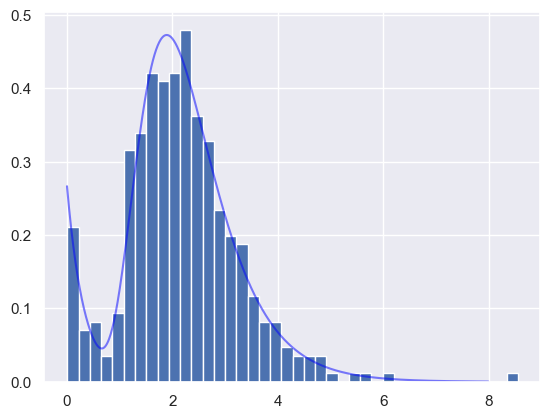

In [9]:
fig, ax = plt.subplots()
ax.hist(x, density=True, bins=int(len(x)/10))
ax.plot(plot_x, f(plot_x), color="blue", alpha=0.5)

# R-code

    w      = 0.1
    mu     = mean(log(x))
    tau    = sd(log(x))
    lambda = 20/mean(x)

    v = array(0, dim=c(n,2))
    v[,1] = log(w) + dexp(x, lambda, log=TRUE)    
    v[,2] = log(1-w) + dlnorm(x, mu, tau, log=TRUE)
    for(i in 1:n){
      v[i,] = exp(v[i,] - max(v[i,]))/sum(exp(v[i,] - max(v[i,])))
      }

    w      = mean(v[,1])
    lambda = sum(v[,1])/sum(v[,1]*x)
    mu     = sum(v[,2]*log(x))/sum(v[,2])
    tau    = sqrt(sum(v[,2]*(log(x) - mu)^2)/sum(v[,2]))


    QQn = 0
    for(i in 1:n){
      QQn = QQn + v[i,1]*(log(w) + dexp(x[i], lambda, log=TRUE)) +
                  v[i,2]*(log(1-w) + dlnorm(x[i], mu, tau, log=TRUE)) 
    }
    if(abs(QQn-QQ)/abs(QQn)<epsilon){
      sw=TRUE
    }
    QQ = QQn
